In [19]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [20]:
#define state
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [21]:
def calculate_bmi(state:BMIState)->BMIState:
    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight/pow(height,2)

    state['bmi']=round(bmi,2)

    return state


In [22]:
def find_category(state:BMIState)->BMIState:
    bmi = state['bmi']
    if bmi<18.5:
        state['category']="Underweight"
    elif bmi<25:
        state['category']="Normal"
    elif bmi<30:
        state['category']="Overweight"
    else:
        state['category']="Obese"
    return state

In [23]:
#define your graph
graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('find_category',find_category)

#add edges to your graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','find_category')
graph.add_edge('find_category',END)

#compile the graph
workflow = graph.compile()

In [31]:
#execute the graph
output_state = workflow.invoke({'weight_kg':76.5,'height_m':1.75})
print(output_state)

{'weight_kg': 76.5, 'height_m': 1.75, 'bmi': 24.98, 'category': 'Normal'}


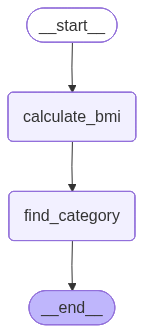

In [25]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())